# 1. Diabetes Risk Stratification and Dataset Shift

## 1.0 Read in Data

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

path_to_project = os.path.abspath(os.path.join(os.getcwd(), '../'))    
sys.path.insert(1, os.path.join(path_to_project))

In [2]:
from src.directory import diabetic_filepath
import pandas as pd

In [3]:
# read data
diabetic_df = pd.read_csv(diabetic_filepath)

# convert missing data to nan
diabetic_df.replace({'?': float('nan')}, inplace=True)

# sort values by ages
diabetic_df.sort_values(by='age', inplace=True)

In [4]:
# set column names
readmission_col = 'readmitted'
age_col = 'age'
gender_col = 'gender'
race_col = 'race'
readmission_30_val = '<30'

In [5]:
# set numeric and categorical cols
numeric_predictor_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
ordinal_predictor_cols = ['age']
categorical_predictor_cols = ['race', 'gender', 
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [6]:
# encode outcome col
outcome_col = 'y'
diabetic_df[outcome_col] = diabetic_df[readmission_col] == readmission_30_val

# set predictor cols
predictor_cols = numeric_predictor_cols + categorical_predictor_cols

## 1.1 Data Exploration

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
# get head
diabetic_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [87]:
diabetic_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
diabetic_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [18]:
diabetic_df[readmission_col].unique()

array(['NO', '>30', '<30'], dtype=object)

/tmp/ipykernel_2537932/2294492265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readmission_30_df.sort_values(by=age_col, inplace=True)


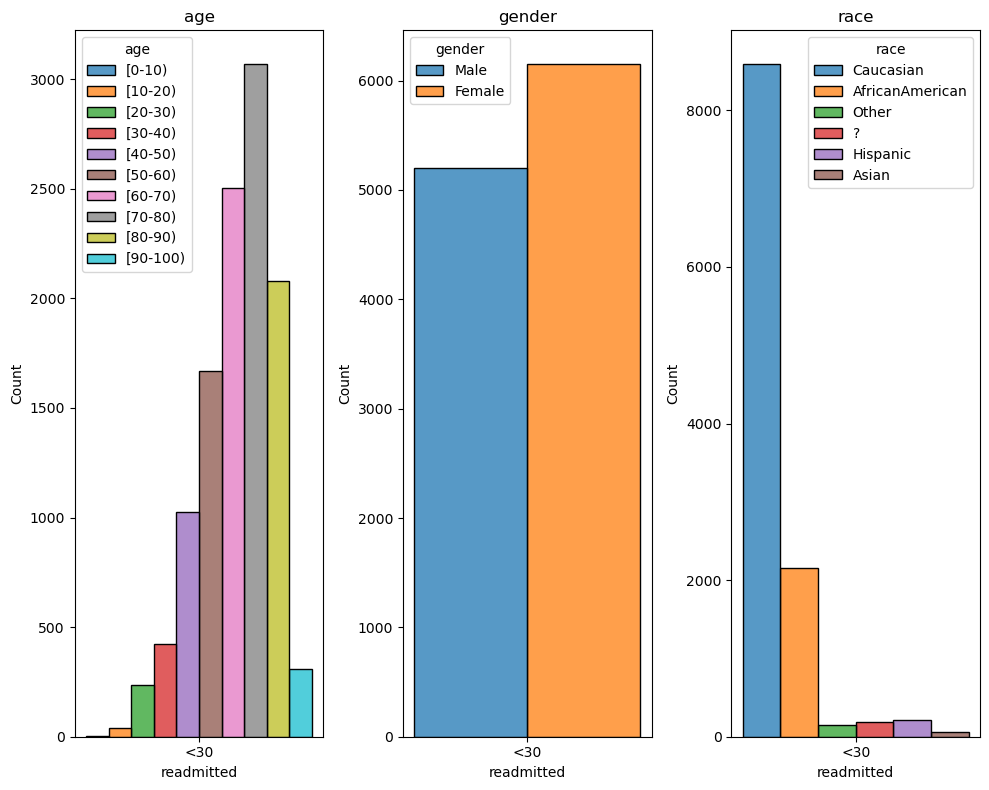

In [ ]:
group_keys = [age_col, gender_col, race_col]

# create figure
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(10, 8))

# get patients who were readmitted <30 days
readmission_30_df = diabetic_df.query(f'{readmission_col} == "{readmission_30_val}"')

# sort values by age
readmission_30_df.sort_values(by=age_col, inplace=True)

# plot
for key, ax in zip(group_keys, axes.flat):
    hue_order = readmission_30_df[age_col] if key == age_col else None
    sns.histplot(data=readmission_30_df, 
                 x=readmission_col, hue=key, multiple='dodge', ax=ax)
    ax.set_title(key)

plt.tight_layout()


## 1.2 Model Development

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from src.utils import Columns

In [22]:
models = [DecisionTreeClassifier, MLPClassifier, LogisticRegression]

In [ ]:
# set hyperparameter grid to search
hp_grids = {
    MLPClassifier.__name__ : {
        'hidden_layer_sizes': [(50,50), (100,)],
        'activation': ['relu'],
        'alpha': [1e-4, 1e-3],
        'max_iter': [1000]
    },
    DecisionTreeClassifier.__name__ : {
        'criterion': ['gini'],
        'max_depth': [5, 10],
        # 'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 3]
    },
    LogisticRegression.__name__ : {
        'penalty': ['l1', 'l2'],
        'C': [1e-1, 1e-2],
        'max_iter': [1000],
        'solver': ['saga']
    }
}

In [ ]:
cv_results = {}
random_state = 40
for i, model in enumerate(models):
  model_name = model.__name__
  
  # solution for multicollinearity
  if model_name == LogisticRegression.__name__:
    ohe_kwargs = dict(drop='first')
  else:
    ohe_kwargs = {}
  
  # fit encoders
  ohe = OneHotEncoder(sparse_output=False, **ohe_kwargs)
  ohe.fit(diabetic_df[categorical_predictor_cols])
  ohe_cols = ohe.get_feature_names_out().tolist()

  oe = OrdinalEncoder()
  oe.fit(diabetic_df[ordinal_predictor_cols]) 

  # create new df; add ohe cols df & drop non-ohe columns
  train_df = pd.concat([diabetic_df[[*numeric_predictor_cols, outcome_col]].copy(),
                        pd.DataFrame(ohe.transform(diabetic_df[categorical_predictor_cols]), columns=ohe_cols),
                        pd.DataFrame(oe.transform(diabetic_df[ordinal_predictor_cols]), columns=ordinal_predictor_cols),
                        ], axis=1)
  train_predictor_cols = numeric_predictor_cols + ordinal_predictor_cols + ohe_cols
  
  # # drop NaN
  # if model_name != DecisionTreeClassifier.__name__:
  #   train_df.dropna(how='any', axis=0)
  
  # make pipeline
  pipeline = Pipeline([
    ("features", FeatureUnion([
        ('numeric_transform', make_pipeline(Columns(names=numeric_predictor_cols),StandardScaler())),
        ('no_transform', make_pipeline(Columns(names=ohe_cols+ordinal_predictor_cols),))
    ])),
    (model_name, model(random_state=random_state))
  ])

  param_grid = {f'{model_name}__{k}':v for k,v in hp_grids[model_name].items()}
  clf = GridSearchCV(pipeline, param_grid, scoring='roc_auc') # Stratified KFold CV
  clf.fit(train_df[train_predictor_cols], train_df[outcome_col])
  
  cv_results[model_name] = clf

In [29]:
best_params = {model.__name__ : cv_results[model.__name__ ].best_params_ for model in models}
best_scores = {model.__name__ : cv_results[model.__name__ ].best_score_ for model in models}

In [30]:
best_scores

{'DecisionTreeClassifier': 0.6464658434430172,
 'MLPClassifier': 0.6352632891967664,
 'LogisticRegression': 0.6662573184007854}

In [32]:
best_params

{'DecisionTreeClassifier': {'DecisionTreeClassifier__criterion': 'gini',
  'DecisionTreeClassifier__max_depth': 5,
  'DecisionTreeClassifier__min_samples_leaf': 1,
  'DecisionTreeClassifier__min_samples_split': 2},
 'MLPClassifier': {'MLPClassifier__activation': 'relu',
  'MLPClassifier__alpha': 0.01,
  'MLPClassifier__hidden_layer_sizes': (50,),
  'MLPClassifier__max_iter': 1000},
 'LogisticRegression': {'LogisticRegression__C': 0.1,
  'LogisticRegression__max_iter': 1000,
  'LogisticRegression__penalty': 'l1',
  'LogisticRegression__solver': 'saga'}}

In [35]:
best_classifier_name = pd.DataFrame.from_dict(best_scores, orient='index').idxmax().item()
best_classifier_name

'LogisticRegression'

## 1.3 Distribution Shift

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.metrics import roc_auc_score
from src.utils import Columns

In [ ]:
# best_params = { # TODO: update best params
#   'DecisionTreeClassifier': {'DecisionTreeClassifier__criterion': 'gini',
#   'DecisionTreeClassifier__max_depth': 5,
#   'DecisionTreeClassifier__min_samples_leaf': 1,
#   'DecisionTreeClassifier__min_samples_split': 2},
#  'MLPClassifier': {'MLPClassifier__activation': 'relu',
#   'MLPClassifier__alpha': 0.01,
#   'MLPClassifier__hidden_layer_sizes': (50,),
#   'MLPClassifier__max_iter': 1000},
#  'LogisticRegression': {'LogisticRegression__C': 0.1,
#   'LogisticRegression__max_iter': 1000,
#   'LogisticRegression__penalty': 'l1',
#   'LogisticRegression__solver': 'saga'}
#  }

In [ ]:
# set up model
model_name = LogisticRegression.__name__
linear_model = LogisticRegression(random_state=40,
                                  **{k.replace(f'{model_name}__', ''):v for k,v in best_params[model_name].items()})

In [ ]:
# fit encoders
ohe = OneHotEncoder(sparse_output=False, drop='first')
ohe.fit(diabetic_df[categorical_predictor_cols])
ohe_cols = ohe.get_feature_names_out().tolist()

oe = OrdinalEncoder()
oe.fit(diabetic_df[ordinal_predictor_cols])

OrdinalEncoder()

In [27]:
# get training dfs
train_df = pd.concat([diabetic_df[[*numeric_predictor_cols, outcome_col]],
                      pd.DataFrame(oe.transform(diabetic_df[ordinal_predictor_cols]),columns=ordinal_predictor_cols),
                      pd.DataFrame(ohe.transform(diabetic_df[categorical_predictor_cols]),columns=ohe_cols)],
                     axis=1)
train_predictor_cols = numeric_predictor_cols + ohe_cols + ordinal_predictor_cols

# split by age
encoding_up_to_50 = oe.transform([['[40-50)']]).squeeze()
younger_50_idx = train_df['age'] <= encoding_up_to_50
younger50_df = train_df[younger_50_idx]
older50_df = train_df[~younger_50_idx]

/home/hentipapai/miniconda3/envs/cph200b_project3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [ ]:
# make pipeline
pipeline = Pipeline([
("features", FeatureUnion([
    ('numeric_transform', make_pipeline(Columns(names=numeric_predictor_cols),
                                        StandardScaler())),
    ('no_transform', make_pipeline(Columns(names=ordinal_predictor_cols+ohe_cols),
                                        )),
    ])),
(model_name, linear_model),
])


In [ ]:
score_func = roc_auc_score

# Train a model on only patients younger than 50.
pipeline.fit(younger50_df[train_predictor_cols], younger50_df[outcome_col])

# What is the performance of the best linear model trained and tested on patients younger than 50? 
younger50_score = score_func(younger50_df[outcome_col], pipeline.predict_proba(younger50_df[train_predictor_cols])[:,1])
print(f'Younger than 50 score {score_func.__name__}:', younger50_score)

# Using patients older than 50 as a target distribution, what is the performance of the younger-than-50 model on the older than 50 population?
older50_score = score_func(older50_df[outcome_col], pipeline.predict_proba(older50_df[train_predictor_cols])[:,1])
print(f'Older than 50 {score_func.__name__}:', older50_score)


Younger than 50 score roc_auc_score: 0.6405378273237193
Older than 50 roc_auc_score: 0.622460272281576


# 2 FDA Request for Comments

The two notable parts in the draft guidance are (1) the risk-based credibility assessment framework and (2) the recommendation to engage with different FDA groups to appropriately set expectationson on how credibility is assessed and maintained during the regulatory life cycle of models proposed for deployment.

